(20, 1)


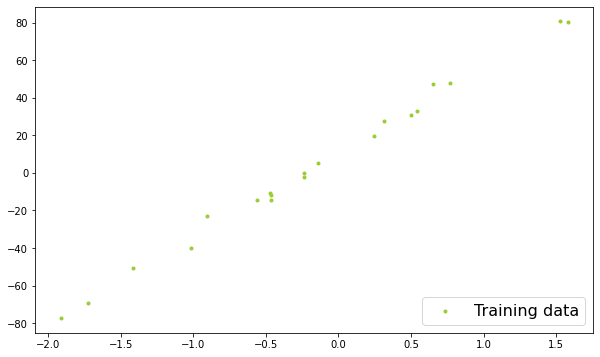

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)
rcParams['legend.fontsize'] = 16
rcParams['axes.labelsize'] = 16

n_samples = 20
inlier_noise = 3
model_intercept = 10.0

# Generate data
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, bias=model_intercept, noise=inlier_noise,
                                      coef=True, random_state=42)

print(X.shape)
plt.scatter(X, y, color='yellowgreen', marker='.',label='Training data')
plt.legend(loc='lower right')

Ground truth coefficients: (10.0, array(45.60699842))
Linear regression coefficients: [    0.            55.25120542  -141.27210672   -95.78314625
   687.95472131   319.06010748 -1051.0723883   -475.48656319
   565.17925051   255.63001485  -101.03497569   -44.36329256
     1.12609604]
Ridge regression coefficients: [ 0.         32.57606429  2.05697311 11.17614709  1.20813197  3.57106027
  1.06702643 -0.68697547  0.79438657 -2.16069478 -1.4666332   0.58163759
  0.33876234]
Lasso regression coefficients: [ 0.00000000e+00  4.22429311e+01  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  1.85232438e-01
 -0.00000000e+00  2.85978468e-02 -3.41371020e-03 -1.29612918e-02
  2.45975875e-03]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.48450391239197, tolerance: 3.6645639975231434
  positive)


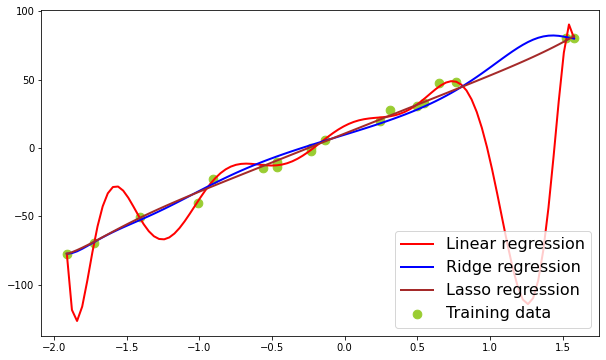

In [ ]:
from sklearn import linear_model

poly = PolynomialFeatures(12)
X_poly = poly.fit_transform(X)

print('Ground truth coefficients: {}'.format((model_intercept,coef)))

lr = linear_model.LinearRegression()
lr.fit(X_poly, y)
print('Linear regression coefficients: {}'.format(lr.coef_))

lamba_ridge_lasso = 1.0

rr = linear_model.Ridge(alpha=lamba_ridge_lasso)
rr.fit(X_poly, y)
print('Ridge regression coefficients: {}'.format(rr.coef_))

lasso = linear_model.Lasso(alpha=lamba_ridge_lasso)
lasso.fit(X_poly, y)
print('Lasso regression coefficients: {}'.format(lasso.coef_))

# Use the model to generate data to plot
linspace_X = np.linspace(X.min(), X.max(), num=100)[:, np.newaxis]
linspace_X_poly = poly.fit_transform(linspace_X)
linspace_y_lr = lr.predict(linspace_X_poly)
linspace_y_rr = rr.predict(linspace_X_poly)
linspace_y_lasso = lasso.predict(linspace_X_poly)

plt.scatter(X, y, color='yellowgreen', marker='.', s=300, label='Training data')
plt.plot(linspace_X, linspace_y_lr, color='red', linewidth=2, label='Linear regression')
plt.plot(linspace_X, linspace_y_rr, color='blue', linewidth=2, label='Ridge regression')
plt.plot(linspace_X, linspace_y_lasso, color='brown', linewidth=2, label='Lasso regression')
plt.legend(loc='lower right')